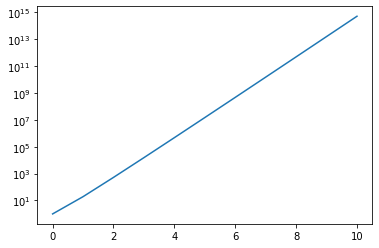

[  3. -24.  30.]
[ -5.33991617  25.58571102 -18.37708222]
0.10199776021168722


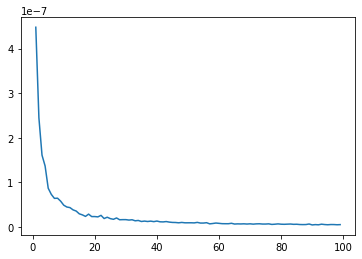

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

#(a)
A = sc.hilbert(3)
K = np.linalg.cond(A)

n_start = 2
n_end = 13
diff = n_end - n_start
N = np.zeros(diff)
K = np.zeros(diff)

for i in range(diff):
    N[i] = i
    A = sc.hilbert(i+1)
    K[i] = np.linalg.cond(A)

plt.plot(N,K)
plt.yscale("log")

plt.show()

#(b)

n = 3
maxden = (2*n+1)**2

b = np.ones(n)
db = np.random.rand(n)/maxden

H = sc.hilbert(n)
dH = np.random.rand(n,n)/maxden

x = np.linalg.solve(H,b)

xper = np.linalg.solve(H+dH,b + db)

print(x)
print(xper)

dx = xper - x

Q = np.linalg.norm(dx)/np.linalg.norm(x) / (np.linalg.norm(dH)/np.linalg.norm(H) + np.linalg.norm(db)/np.linalg.norm(b))
K = np.linalg.cond(H)

def calculate_quotient(mult):
    n = 5

    b = np.ones(n)
    db = np.random.rand(n) * mult/(2*n+1)

    H = sc.hilbert(n)
    dH = np.random.rand(n,n) * mult/(2*n+1)

    x = np.linalg.solve(H,b)
    xper = np.linalg.solve(H+dH,b + db)
    
    Q = np.linalg.norm(dx)/np.linalg.norm(x) / (np.linalg.norm(dH)/np.linalg.norm(H) + np.linalg.norm(db)/np.linalg.norm(b))
    K = np.linalg.cond(H)
    
    return Q/K
    

print(Q/K)

ratio = [ calculate_quotient(i) for i in range(1,100)]
mult = [i for i in range(1,100)]

plt.plot(mult,ratio)

plt.show()

